# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Цель проекта:
1. Установить параметры, влияющие на цену объектов недвижимости на примере Санкт-Петербурга и соседних населенных пунктов;
2. Сформировать выводы в виде тезисов для построения автоматизированной системы отслеживания аномалий и мошеннических действий. 
    
<b>Этапы выполнения:</b> 
1. Изучение данных: анализ общей информации;
2. Предобработка данных: удаление и замена пропусков и дубликатов, преобразование типов данных;
2. Добавление новых параметров на основе собранных данных:
- цена за квадратный метр;
- год, месяц, день недели публикации объявления;
- тип этажа квартиры;
- расстояние до центра города в км.
3. Исследовательский анализ данных:
- изучение параметров объектов недвижимости и обработка аномальных значений;
- расчет скорости продажи квартир;
- анализ влияния факторо на скорость продажи квартир.
4. Формирование общегго вывода.
    
<b>Описание данных:</b>
*	airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
*	balcony — число балконов
*	ceiling_height — высота потолков (м)
*	cityCenters_nearest — расстояние до центра города (м)
*	days_exposition — сколько дней было размещено объявление (от публикации до снятия)
*	first_day_exposition — дата публикации
*	floor — этаж
*	floors_total — всего этажей в доме
*	is_apartment — апартаменты (булев тип)
*	kitchen_area — площадь кухни в квадратных метрах (м²)
*	last_price — цена на момент снятия с публикации
*	living_area — жилая площадь в квадратных метрах (м²)
*	locality_name — название населённого пункта
*	open_plan — свободная планировка (булев тип)
*	parks_around3000 — число парков в радиусе 3 км
*	parks_nearest — расстояние до ближайшего парка (м)
*	ponds_around3000 — число водоёмов в радиусе 3 км
*	ponds_nearest — расстояние до ближайшего водоёма (м)
*	rooms — число комнат
*	studio — квартира-студия (булев тип)
*	total_area — общая площадь квартиры в квадратных метрах (м²)
*	total_images — число фотографий квартиры в объявлении

Данные, заполняемые автоматически:
1. Расстояние до объектов (центра, водоема, аэропорта);
2. Количество объектов рядом (водоемы, парки).

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv()

Выведем первые 5 строк таблицы и ознакомимся с данными

In [3]:
print(data.head())

  total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0  20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...                                                                                                                                                                                                                                                                  
1  7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...                                                                                                                                                                                                                                                                  
2  10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...               

Данные склеились из-за разделителя, который отличается от ",". Укажем в явном виде разделитель и приведем данные в порядок

In [4]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t', decimal=',')

In [5]:
data.head(pd.set_option('max_columns', None))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.0,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.5,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.00000000000001
23696,18,2500000.0,56.7,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,False,False,23.3,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


Выведем общую информацию о данных

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   total_images          23699 non-null  int64 
 1   last_price            23699 non-null  object
 2   total_area            23699 non-null  object
 3   first_day_exposition  23699 non-null  object
 4   rooms                 23699 non-null  int64 
 5   ceiling_height        14504 non-null  object
 6   floors_total          23613 non-null  object
 7   living_area           21796 non-null  object
 8   floor                 23699 non-null  int64 
 9   is_apartment          2775 non-null   object
 10  studio                23699 non-null  bool  
 11  open_plan             23699 non-null  bool  
 12  kitchen_area          21421 non-null  object
 13  balcony               12180 non-null  object
 14  locality_name         23650 non-null  object
 15  airports_nearest      18157 non-null

In [7]:
#функция для расчета количесства строк в столбце, количество заполненных и доли пропусков
def ser_info(ser, str1 = "-------\n", str2 = "\n\n") :
    print(str1)
    ser_size = ser.size
    not_na_count = ser.notna().sum()
    na_count = ser.isna().sum()
    dublicated = ser.duplicated().sum()
    
    if ser_size == na_count:
        print('Данные отсутствуют')
    elif ser_size == 0 :
        print('Данные отсутствуют')
    else:
        print(f"size: {ser_size}")
        print(f"na_count: {na_count}")
        print(f"not_na_count: {not_na_count}")
        print(f"na_ratio: {(na_count / ser_size):.2f}") 
        print(f"duplicated: {dublicated}") 
        print(f"duplicated_ratio: {(dublicated / ser_size):.2f}") 
    print(str2)

In [8]:
#проверяем, как работает
ser_info(data["floor"])

-------

size: 23699
na_count: 0
not_na_count: 23699
na_ratio: 0.00
duplicated: 23666
duplicated_ratio: 1.00





In [9]:
#создаем функцию для применения предыдущей функции к каждому столбцу 
def data_info (data, col_name):
    print(col_name)
    ser_info(data[col_name])

In [10]:
#смотрим результат
for el in data.columns:
    data_info(data, el)
print(data.info())
print(data.head())

total_images
-------

size: 23699
na_count: 0
not_na_count: 23699
na_ratio: 0.00
duplicated: 23661
duplicated_ratio: 1.00



last_price
-------

size: 23699
na_count: 0
not_na_count: 23699
na_ratio: 0.00
duplicated: 20721
duplicated_ratio: 0.87



total_area
-------

size: 23699
na_count: 0
not_na_count: 23699
na_ratio: 0.00
duplicated: 21517
duplicated_ratio: 0.91



first_day_exposition
-------

size: 23699
na_count: 0
not_na_count: 23699
na_ratio: 0.00
duplicated: 22208
duplicated_ratio: 0.94



rooms
-------

size: 23699
na_count: 0
not_na_count: 23699
na_ratio: 0.00
duplicated: 23682
duplicated_ratio: 1.00



ceiling_height
-------

size: 23699
na_count: 9195
not_na_count: 14504
na_ratio: 0.39
duplicated: 23515
duplicated_ratio: 0.99



floors_total
-------

size: 23699
na_count: 86
not_na_count: 23613
na_ratio: 0.00
duplicated: 23662
duplicated_ratio: 1.00



living_area
-------

size: 23699
na_count: 1903
not_na_count: 21796
na_ratio: 0.08
duplicated: 21916
duplicated_ratio: 0.9

В данных есть пропуски, числовой тип данных присутствует только у столбцов с количеством комнат, количеством фото в объявлении и этажами. Данные нужно предварительно обработать  

### Предобработка данных

Пропуски данных есть в столбцах: 
* ceiling_height - высота потолков (м)
* floors_total - всего этажей в доме
* living_area - жилая площадь в квадратных метрах (м²)
* is_apartment - апартаменты 
* kitchen_area - площадь кухни в квадратных метрах (м²)
* balcony - число балконов
* locality_name - название населённого пункта
* airports_nearest - расстояние до ближайшего аэропорта в метрах (м)
* cityCenters_nearest - расстояние до центра города (м)
* parks_around3000 - число парков в радиусе 3 км
* parks_nearest - расстояние до ближайшего парка (м)
* ponds_around3000 - число водоёмов в радиусе 3 км
* ponds_nearest - расстояние до ближайшего водоёма (м)
* days_exposition - сколько дней было размещено объявление 

Поработаем с пропусками в каждом столбце.

Посчитаем количество пропусков для каждого столбца 

In [11]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [12]:
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,38.800000
floors_total,0.400000
living_area,8.000000
floor,0.000000
is_apartment,88.300000


In [13]:
#начнем с населенного пункта: данные без названия населенного пункта нам не подойдут, 
#ведь это один из ключевых параметов, влияющих на стоимость объекта недвижимости. Удаляем их. 
data = data.dropna(subset=['locality_name'])

Сразу удалим неявные дубли в столбце locality_name - это один из ключевых параметров, который потребуется в дальнейшем

In [14]:
#найдем все уникальные значения по населенному пункту
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [15]:
#заменим все повторяющиеся значения
data['locality_name'] = data['locality_name'].replace('поселок городского типа Большая Ижора' , 'городской поселок Большая Ижора')
data['locality_name'] = data['locality_name'].replace('посёлок городского типа Вырица' , 'поселок городского типа Вырица')
data['locality_name'] = data['locality_name'].replace('посёлок городского типа имени Свердлова' , 'поселок городского типа имени Свердлова')
data['locality_name'] = data['locality_name'].replace('посёлок Коробицыно' , 'поселок Коробицыно')
data['locality_name'] = data['locality_name'].replace('посёлок городского типа Красный Бор' , 'поселок городского типа Красный Бор')
data['locality_name'] = data['locality_name'].replace('посёлок городского типа Кузьмоловский' , 'поселок городского типа Кузьмоловский')
data['locality_name'] = data['locality_name'].replace('посёлок городского типа Лебяжье' , 'поселок городского типа Лебяжье')
data['locality_name'] = data['locality_name'].replace('поселок Лесное' , 'коттеджный посёлок Лесное')
data['locality_name'] = data['locality_name'].replace('поселок городского типа Лесогорский' , 'городской посёлок Лесогорский')
data['locality_name'] = data['locality_name'].replace('поселок городского типа Назия' , 'городской посёлок Назия')
data['locality_name'] = data['locality_name'].replace('посёлок городского типа Павлово' , 'городской посёлок Павлово')
data['locality_name'] = data['locality_name'].replace('посёлок Стеклянный' , 'поселок Стеклянный')
data['locality_name'] = data['locality_name'].replace('посёлок городского типа Форносово' , 'поселок городского типа Форносово')
data['locality_name'] = data['locality_name'].replace('посёлок Щеглово' , 'деревня Щеглово')

In [16]:
#Проверим наличие дублей в целом по датафрейму
data.duplicated().sum()

0

Посмотрим остальные по порядку: сделаем срез данных с пропусками в столбце ceiling_height

In [17]:
print(data[data['ceiling_height'].isna()].head())

   total_images  last_price total_area first_day_exposition  rooms  \
1             7   3350000.0       40.4  2018-12-04T00:00:00      1   
2            10   5196000.0       56.0  2015-08-20T00:00:00      2   
3             0  64900000.0      159.0  2015-07-24T00:00:00      3   
5            10   2890000.0       30.4  2018-09-10T00:00:00      1   
6             6   3700000.0       37.3  2017-11-02T00:00:00      1   

  ceiling_height floors_total living_area  floor is_apartment  studio  \
1            NaN         11.0        18.6      1          NaN   False   
2            NaN          5.0        34.3      4          NaN   False   
3            NaN         14.0         NaN      9          NaN   False   
5            NaN         12.0        14.4      5          NaN   False   
6            NaN         26.0        10.6      6          NaN   False   

   open_plan kitchen_area balcony              locality_name airports_nearest  \
1      False         11.0     2.0             посёлок Шушар

Данные не заполнены для обычных объявлений, это поле заполняется вручную, и, похоже, не является обязательным. При удалении исчезнет почти 40% данных, не подходит. Заполним медианой

In [18]:
#рассчитаем медиану по высоте потолков
ceiling_median = data['ceiling_height'].median()
ceiling_median

2.65

In [19]:
#запоним пропуски медианой
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = ceiling_median

In [20]:
#убедимся, что пропуски заполнены
data['ceiling_height'].isna().sum()

0

Пропуски в столбце floors_total удалим. 
Информация нужна для определения, первый или последний этаж у квартиры, при этом невозможно без адреса определить этажность здания, зная только этаж самой квартиры. 

In [21]:
data = data.dropna(subset=['floors_total'])

Попробуем заменить пропуски в living_area на разницу между общей площадью (пропусков нет) и площадью кухни (пропуски есть)

In [22]:
try:
    data['living_area'] = data['living_area'].fillna(pd.to_numeric(data['total_area'], errors='raise') - pd.to_numeric(data['kitchen_area'], errors='raise'))
except:
    data['living_area'] = data['living_area'].fillna(data['total_area'])

In [23]:
#проверим пропуски в living_area
print(len(data[data['living_area'].isna()]))

1427


In [24]:
#проверим, все ли пропуски в living_area остались там, где нет данных в kitchen_area
print(len(data[(data['kitchen_area'].isna()) & (data['living_area'].isna())]))

1427


In [25]:
#посмотрим, сколько квартир-студий из тех, где не заполнены данные по жилой площади и поощади кухни 
print(len(data[(data['kitchen_area'].isna()) & (data['living_area'].isna()) & (data['studio'] == True)]))

7


In [26]:
#заменим все оставшиеся пропуски в living_area на общую площадь (total_area), игнорируя факт отсутствия площади кухни,
#так как площадь кухни входит в жилую площадь 
data['living_area'] = data['living_area'].fillna(data['total_area'])

#проверим, остались ли пропуски в living_area
print(len(data[data['living_area'].isna()]))

0


In [27]:
#Пропуски в is_apartment могут означать, что это не апартаменты. Проерим, какие значения есть в столбце
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [28]:
#заменим пустые значения на False
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].unique()

array([False,  True])

In [29]:
#аналогично с балконами - проверим, какие данные есть сейчас
data['balcony'].unique()

array([nan, '2.0', '0.0', '1.0', '5.0', '4.0', '3.0'], dtype=object)

In [30]:
#приведем в порядок тип данных в балконах - заменим строку на число 
data['balcony'] = pd.to_numeric(data['balcony'])
data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [31]:
#заменим пустые значения на 0
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].unique()

array([0., 2., 1., 5., 4., 3.])

In [32]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

In [33]:
#предположим, что квартиры, в которых нет площади кухни, имеют совмещенный тип кухня+зал. Заменим пропуски в столбце на 0
data['kitchen_area'] = data['kitchen_area'].fillna(0)
data['kitchen_area'].isna().sum()

0

Остальные пропуски заполним средним значением и/или медианой по населенному пнукту.\
Для этого посмотрим, какие вообще у нас данные по населенному пункту. 

In [34]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Добавим столбец "town", в котором определим города как "город", остальные населенные пункты - как "область". \
Это нам потребуется дальше для того, чтобы понимать зависимость цены в городе и области соответственно. 

In [35]:
#создадим функцию, которая определит принадлежность населенного пункта к городу или области
def categorize_locality(row):
    if 'посел' in row or 'посёл' in row or 'деревн' in row or 'садов' in row or 'село' in row:
        return 'область'
    else:
        return 'город'

In [36]:
#применим ее к нашим населенным пунктам
data['categorize_locality'] = data['locality_name'].apply(categorize_locality)

In [37]:
#проверим, как работает
data[['locality_name', 'categorize_locality']].head(20)

,locality_name,categorize_locality
0,Санкт-Петербург,город
1,посёлок Шушары,область
2,Санкт-Петербург,город
3,Санкт-Петербург,город
4,Санкт-Петербург,город
5,городской посёлок Янино-1,область
6,посёлок Парголово,область
7,Санкт-Петербург,город
8,посёлок Мурино,область
9,Санкт-Петербург,город


Чтобы заполнить пропуски медианным значением, нужно, чтобы населенный пункт встречался больше 2 раз, при этом по объекту недвижимости было указано расстояние до аэропорта. Удалим все населенные пункты, которые не подходят под условия.

In [38]:
#создадим сводную по населенному пункту
data_piv = data.pivot_table(index='locality_name', aggfunc='count')

In [39]:
#найдем населенные пункты, которые нужно удалить - сделаем срез по условиям и выведем их название
data_del = data_piv[(data_piv['total_images'] <3)&(data_piv['airports_nearest'] == 0)]['airports_nearest']
data_del.index

Index(['городской посёлок Свирьстрой', 'городской посёлок Советский',
       'деревня Большая Пустомержа', 'деревня Большое Рейзино',
       'деревня Большой Сабск', 'деревня Бор', 'деревня Борисова Грива',
       'деревня Вахнова Кара', 'деревня Выскатка', 'деревня Глинка',
       ...
       'садоводческое некоммерческое товарищество Лесная Поляна',
       'садовое товарищество Новая Ропша', 'садовое товарищество Приладожский',
       'садовое товарищество Рахья', 'садовое товарищество Садко',
       'село Никольское', 'село Паша', 'село Путилово', 'село Старая Ладога',
       'село Шум'],
      dtype='object', name='locality_name', length=137)

In [40]:
#удалим данные по этим населенным пунктам
data = data.query('locality_name not in @data_del.index')

In [41]:
#проверим, что данные удалены
data.shape

(23386, 23)

In [42]:
#заполним пропуски в locality_name медианным значением по населенному пункту 
for t in data['locality_name'].unique(): 
    data.loc[(data['locality_name'] == t) & (data['airports_nearest'].isna()), 'airports_nearest'] = \
    data.loc[(data['locality_name'] == t), 'airports_nearest'].median(skipna=False)

In [43]:
#заполним пропускм там, где значение осталось проигнорированным из-за отсутствия данных для расчета 
#(мало населенных пунктов для расчета медианы) медианой по типу населенного пункта 
for t in data['categorize_locality'].unique(): 
    data.loc[(data['categorize_locality'] == t) & (data['airports_nearest'].isna()), 'airports_nearest'] = \
    data.loc[(data['categorize_locality'] == t), 'airports_nearest'].median()

In [44]:
#проверим, что пропуски заполнены
data['airports_nearest'].isna().sum()

0

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23386 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23386 non-null  int64  
 1   last_price            23386 non-null  object 
 2   total_area            23386 non-null  object 
 3   first_day_exposition  23386 non-null  object 
 4   rooms                 23386 non-null  int64  
 5   ceiling_height        23386 non-null  object 
 6   floors_total          23386 non-null  object 
 7   living_area           23386 non-null  object 
 8   floor                 23386 non-null  int64  
 9   is_apartment          23386 non-null  bool   
 10  studio                23386 non-null  bool   
 11  open_plan             23386 non-null  bool   
 12  kitchen_area          23386 non-null  object 
 13  balcony               23386 non-null  float64
 14  locality_name         23386 non-null  object 
 15  airports_nearest   

Приведем в порядок типы данных.

In [46]:
data['last_price'] = data['last_price'].astype(float)
data['floors_total'] = data['floors_total'].astype(float)
data['airports_nearest'] = data['airports_nearest'].astype(float)
data['cityCenters_nearest'] = data['cityCenters_nearest'].astype(float)
data['parks_around3000'] = data['parks_around3000'].astype(float)
data['parks_nearest'] = data['parks_nearest'].astype(float)
data['ponds_around3000'] = data['ponds_around3000'].astype(float)
data['ponds_nearest'] = data['ponds_nearest'].astype(float)
data['days_exposition'] = data['days_exposition'].astype(float)
data['total_area'] = data['total_area'].astype(float)
data['living_area'] = data['living_area'].astype(float)
data['ceiling_height'] = data['ceiling_height'].astype(float)
data['kitchen_area'] = data['kitchen_area'].astype(float)

data['balcony'] = data['balcony'].astype(int)

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

In [47]:
#Код ревьюера
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23386 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23386 non-null  int64         
 1   last_price            23386 non-null  float64       
 2   total_area            23386 non-null  float64       
 3   first_day_exposition  23386 non-null  datetime64[ns]
 4   rooms                 23386 non-null  int64         
 5   ceiling_height        23386 non-null  float64       
 6   floors_total          23386 non-null  float64       
 7   living_area           23386 non-null  float64       
 8   floor                 23386 non-null  int64         
 9   is_apartment          23386 non-null  bool          
 10  studio                23386 non-null  bool          
 11  open_plan             23386 non-null  bool          
 12  kitchen_area          23386 non-null  float64       
 13  balcony         

Проверим гипотезу: все незаполненные парки в радиусе 3 км не заполнены не случайно: парков рядом нет

In [48]:
print(data[(data['parks_nearest'].isna()) & (data['parks_around3000']>0)])
print(data[(data['parks_around3000'].isna()) & (data['parks_nearest']>0)])

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition, categorize_locality]
Index: []
Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition, categorize_locality]
Index: []


In [49]:
#заполним пропуски в столбцах 0 - парков рядом нет, это не ошибочный вывод
data['parks_nearest'] = data['parks_nearest'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)

In [50]:
#аналогичную операцию проведем с водоемами: проверим, есть ли водоемы в радиусе 3 км, 
#хотя они не указаны в водоемах вообще и наоборот
print(data[(data['ponds_nearest'].isna()) & (data['ponds_around3000']>0)])
print(data[(data['ponds_around3000'].isna()) & (data['ponds_nearest']>0)])

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition, categorize_locality]
Index: []
Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition, categorize_locality]
Index: []


In [51]:
#таких водоемов нет. Заполним пропуски 0
data['ponds_nearest'] = data['ponds_nearest'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

In [52]:
#проверим наличие пропусков и типы данных
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest     5322
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3131
categorize_locality        0
dtype: int64

Выводы по этапу "предобработка данных":
- ceiling_height - высота потолков (м): оставлены без замены, т.к. данные не заполнены для обычных объявлений. Пполе заполняется вручную, и, похоже, не является обязательным. Оставили, как есть (при удалении исчезнет почти 40% данных, не подходит).
- floors_total - всего этажей в доме: пропуски удалены, т.к. информация требуется для расчета типа этажа;
- living_area - жилая площадь в квадратных метрах (м²):  часть данных заменена на разницу между общей площадью и площадью кухни (при наличии площади кухни); оставшаяся часть - на общую площадь;
- is_apartment - апартаменты: пропуски заменены на 0. т.к. если не проставлено значение, предполагаем, что это не апартаменты;
- kitchen_area: площадь кухни в квадратных метрах (м²) - пропуски заменены на 0, т.к. предполагаем, данные отсутствуют в совмещенных типах квартир (кухня + зал);
- balcony: число балконов - пропуски заменены на 0. т.к. если не проставлено значение, предполагаем, что балкона нет;
- locality_name: название населённого пункта - пропуски удалены, т.к. это один из ключевых параметров для дальнейшего анализа. Неявные дубликаты заменены на одно из значений (чаще всего из-за "ё" в названии поселка);
- airports_nearest: расстояние до ближайшего аэропорта в метрах (м) - пропуски заменены медианным значением по населенному пункту или при отсутствии данных для расчета медианы - по типу населенного пункта (город/область);
- cityCenters_nearest: расстояние до центра города (м) - пропуски оставлены без замены, т.к. предполагаем, что данные не указаны для населенных пунктов вне города;
- в столбцах по паркам и водоемах в радиусе 3 км / ближайших данные заменены на 0 - предполагаем, рядом с квартирой нет парка/водоема;
- days_exposition: сколько дней было размещено объявление - пропуски оставлены без замены, предполагаем, объявление еще не снято с публикации, идет продажа. 

### Посчитайте и добавьте в таблицу новые столбцы

In [53]:
#посчитаем цену за квадратный метр
data['price_meter'] = data['last_price'] / data['total_area']

In [54]:
#посчитаем день недели публикации объявления 
data['weekday_publication'] = data['first_day_exposition'].dt.weekday

In [55]:
#посчитаем месяц публикации объявления
data['month_publication'] = pd.DatetimeIndex(data['first_day_exposition']).month

In [56]:
data['first_day_exposition'].dt.date 
data['month_publication'].astype('datetime64[M]') 

0       1970-04-01
1       1971-01-01
2       1970-09-01
3       1970-08-01
4       1970-07-01
           ...    
23694   1970-04-01
23695   1970-02-01
23696   1970-03-01
23697   1970-04-01
23698   1970-08-01
Name: month_publication, Length: 23386, dtype: datetime64[ns]

In [57]:
#посчитаем год публикации объявления
data['year_publication'] = pd.DatetimeIndex(data['first_day_exposition']).year

In [58]:
#посчитаем тип этажа квартиры (значения — «первый», «последний», «другой»)
def categorize_floor(row):
    if row['floor'] == row['floors_total']:
        return 'последний'
    elif row['floor'] == 1:
        return 'первый'
    else:
        return 'другой'

In [59]:
data5 = data
data5['cat_floor'] = data5.apply(categorize_floor, axis=1)

In [60]:
#посчитаем расстояние до центра города в километрах
data['city_center_km'] = round(data['cityCenters_nearest'] / 1000, 0)

### Проведите исследовательский анализ данных

In [61]:
#посмотрим, какие данные есть в столбцах и их распределение 
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter,weekday_publication,month_publication,year_publication,city_center_km
count,23386.000000,2.338600e+04,23386.000000,23386.000000,23386.000000,23386.000000,23386.000000,23386.000000,23386.000000,23386.000000,23386.000000,18064.000000,23386.000000,23386.000000,23386.000000,23386.000000,20255.000000,2.338600e+04,23386.000000,23386.000000,23386.000000,18064.000000
mean,9.887026,6.575529e+06,60.382822,2.070683,2.723246,10.726161,36.512961,5.902549,9.585679,0.594373,28207.028308,14192.656056,0.472419,168.449542,0.594415,200.259300,180.687485,9.989382e+04,2.566364,6.400539,2017.370050,14.186504
std,5.683264,1.094395e+07,35.731576,1.079879,0.969062,6.592148,25.507802,4.879365,6.418599,0.962149,11152.447843,8613.348153,0.750132,307.120966,0.885829,305.863753,219.836187,5.024955e+04,1.788920,3.492851,1.037826,8.621131
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,181.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.118349e+02,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,3.450000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,6.300000,0.000000,21036.250000,9238.000000,0.000000,0.000000,0.000000,0.000000,45.000000,7.709695e+04,1.000000,3.000000,2017.000000,9.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,31.000000,4.000000,9.000000,0.000000,26831.000000,13096.500000,0.000000,0.000000,0.000000,0.000000,95.000000,9.519231e+04,3.000000,6.000000,2017.000000,13.000000
75%,14.000000,6.800000e+06,70.000000,3.000000,2.700000,16.000000,44.000000,8.000000,11.500000,1.000000,34467.000000,16285.000000,1.000000,304.000000,1.000000,393.000000,231.000000,1.143791e+05,4.000000,10.000000,2018.000000,16.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,571.000000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,6.000000,12.000000,2019.000000,66.000000


В данных есть выбросы (например, квартира за 763 млн), нужно проверить значение каждого интересующего нас столбца. 

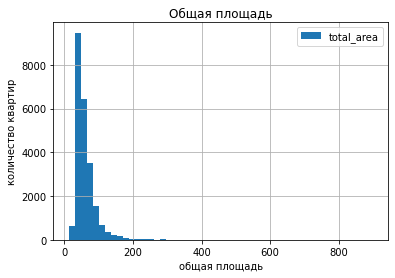

In [62]:
#построим гистограмму для общей площади

data.plot(
    kind='hist',
    y='total_area',
    bins=50,
    grid=True,
    title='Общая площадь',
    legend=True
)

plt.xlabel("общая площадь"),
plt.ylabel("количество квартир");

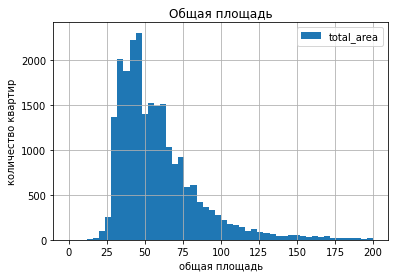

In [63]:
#добавим ограничение по значениям - от 0 до 200 метров
data.plot(
    kind='hist',
    y='total_area',
    bins=50,
    grid=True,
    range=(0, 200),
    title='Общая площадь',
    legend=True
)

plt.xlabel("общая площадь"),
plt.ylabel("количество квартир");

In [64]:
#посчитаем, сколько квартир площадью до 25 и более 200 метров
data[(data['total_area'] < 20) | (data['total_area'] > 200)]['total_area'].count()

252

In [65]:
#признаем эти значения выбросами и удалим их. 
data = data[data['total_area'] >= 20]
data = data[data['total_area'] <= 200]

Из данных для расчета исключены квартиры площадью менее 20 м и более 200 - таких ланных мало и они сильно отличаются от среднего.

In [66]:
data.shape

(23134, 29)

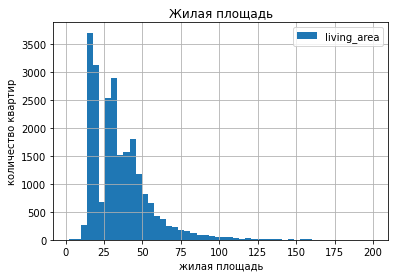

In [67]:
#построим гистограмму для жилой площади
data.plot(
    kind='hist',
    y='living_area',
    bins=50,
    grid=True,
    title='Жилая площадь',
    legend=True
)

plt.xlabel("жилая площадь"),
plt.ylabel("количество квартир");

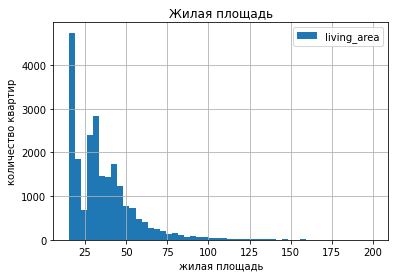

In [68]:
#добавим ограничение по значениям - от 20 до 200 метров
data.plot(
    kind='hist',
    y='living_area',
    bins=50,
    grid=True,
    range=(15, 200),
    title='Жилая площадь',
    legend=True
)

plt.xlabel("жилая площадь"),
plt.ylabel("количество квартир");

In [69]:
#посчитаем, сколько квартир площадью до 20 и более 200 метров
data[(data['living_area'] < 20) | (data['living_area'] > 200)]['living_area'].count()

6163

Удалять данные нельзя - слишком много квартир с лощадью до 20 и больше 200 м. 

In [70]:
#посчитаем, сколько квартир площадью до 10 и более 200 метров
data[(data['living_area'] < 10) | (data['living_area'] > 200)]['living_area'].count()

24

In [71]:
#признаем эти значения выбросами и удалим их. 
data = data[data['living_area'] >= 10]
data = data[data['living_area'] <= 200]

Жилая площадь менее 10 м - неправдоподобные объявления, а зачения больше 200 - редкий случай. 

In [72]:
data.shape

(23110, 29)

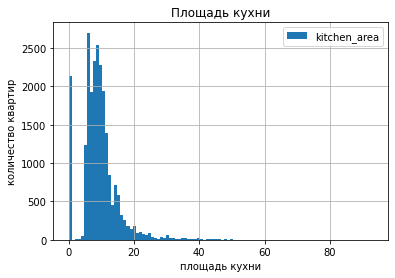

In [73]:
#построим гистограмму для площади кухни
data.plot(
    kind='hist',
    y='kitchen_area',
    bins=100,
    grid=True,
    title='Площадь кухни',
    legend=True
)

plt.xlabel("площадь кухни"),
plt.ylabel("количество квартир");

In [74]:
#посчитаем, сколько квартир с кухней площадью до 2 и более 50 метров
data[(data['kitchen_area'] < 2) | (data['kitchen_area'] > 50)]['kitchen_area'].count()

2169

Если площадь кухни указана как 0 - речь может идти о совмещенном пространстве кухня + зал. 
Посмотрим, сколько кухонь с площадью 0 и типом кварты - студия

In [75]:
data['studio'].value_counts()

False    22973
True       137
Name: studio, dtype: int64

In [76]:
#посчитаем, сколько квартир-студий с кухней площадью до 2 
data[(data['kitchen_area'] < 2) & (data['studio'] == True)]['kitchen_area'].count()

137

Всего 10% квартир с площадью кухни менее 2 м показаны как студия. 
Оставим данные - возможно, информация о кухне не указана владельцем, при этом сама кухня есть 

In [77]:
#посчитаем, сколько квартир с кухней площадью > 30
data[data['kitchen_area'] > 30]['kitchen_area'].count()

250

In [78]:
#признаем эти значения выбросами и удалим их. 
data = data[data['kitchen_area'] <= 30]

In [79]:
data.shape

(22860, 29)

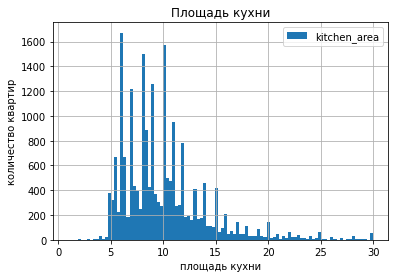

In [80]:
data.plot(
    kind='hist',
    y='kitchen_area',
    bins=100,
    grid=True,
    range=(1,30),
    title='Площадь кухни',
    legend=True
)

plt.xlabel("площадь кухни"),
plt.ylabel("количество квартир");

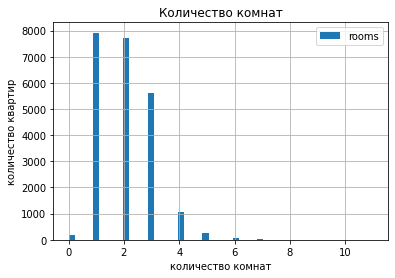

In [81]:
#построим гистограмму для количества комнат
data.plot(
    kind='hist',
    y='rooms',
    bins=50,
    grid=True,
    title='Количество комнат',
    legend=True
)

plt.xlabel("количество комнат"),
plt.ylabel("количество квартир");

In [82]:
#посчитаем, сколько квартир c более, чем 6 комнатами
data[data['rooms'] > 6]['rooms'].count()

24

In [83]:
#признаем эти значения выбросами и удалим их. 
data = data[data['rooms'] <= 6]

Удаляем квартиры с более, чем 6 комнатами: таких очень мало. Большинство продаваемых квартир - это 1-, 2- и 3-х комнатные квартиры. \
Квартиры с 0 комнатами оставим: возможно, имелась в виду квартира-студия, где пространства совмещены (зал+кухня)

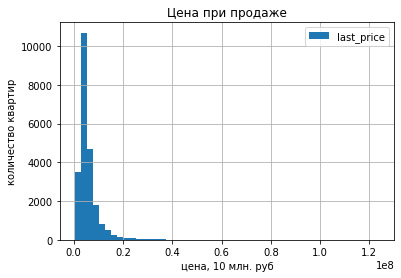

In [84]:
#построим гистограмму для цены
data.plot(
    kind='hist',
    y='last_price',
    bins=50,
    grid=True,
    title='Цена при продаже',
    legend=True
)

plt.xlabel("цена, 10 млн. руб"),
plt.ylabel("количество квартир");

In [85]:
#посчитаем, сколько квартир продали мненьше, чем за млн
data[data['last_price'] < 1e6]['last_price'].count()

185

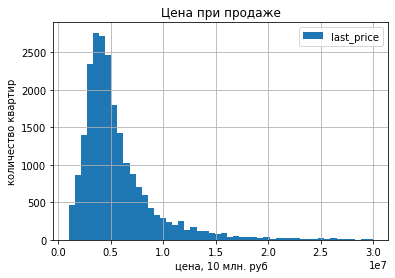

In [86]:
#отсечем квартиры меньше, чем за миллион и больше, чем за 30 млн
data.plot(
    kind='hist',
    y='last_price',
    bins=50,
    grid=True,
    range=(1e6, 3e7),
    title='Цена при продаже',
    legend=True
)

plt.xlabel("цена, 10 млн. руб"),
plt.ylabel("количество квартир");

In [87]:
#посчитаем, сколько таких квартир
data[(data['last_price'] < 1e6) | (data['last_price'] > 3e7)]['last_price'].count()

331

In [88]:
#признаем эти значения выбросами и удалим их. 
data = data[data['last_price'] >= 1e6]
data = data[data['last_price'] <= 3e7]

Исключены данные по квартирам стоимостю менее 1 млн (неправдоподобно) и более 30 млн (слишком мало случаев, при этом они сильно влияют на распределение)

In [89]:
data.shape

(22505, 29)

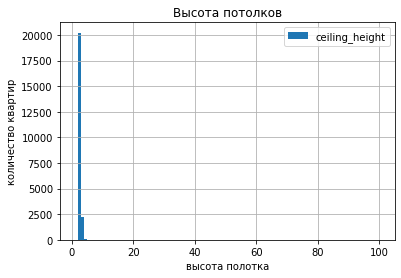

In [90]:
#построим гистограмму для высоты потолков
data.plot(
    kind='hist',
    y='ceiling_height',
    bins=100,
    grid=True,
    title='Высота потолков',
    legend=True
)

plt.xlabel("высота полотка"),
plt.ylabel("количество квартир");

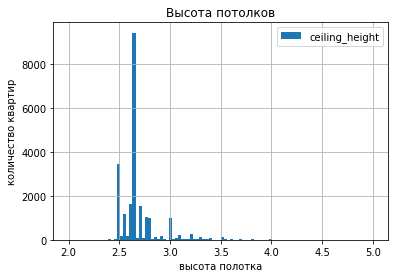

In [91]:
#построим гистограмму для высоты потолков с ограничением в 5 метров
data.plot(
    kind='hist',
    y='ceiling_height',
    bins=100,
    grid=True,
    range=(2,5),
    title='Высота потолков',
    legend=True
)

plt.xlabel("высота полотка"),
plt.ylabel("количество квартир");

In [92]:
#посчитаем, сколько квартир с потолками больше 5 метров
data[data['ceiling_height'] > 5]['ceiling_height'].count()

29

In [93]:
#Посмотрим, какие значения в этом  столбце
data[data['ceiling_height'] > 5]['ceiling_height']

355       25.0
3148      32.0
3474       8.0
4643      25.0
4876      27.0
5076      24.0
5669      26.0
5807      27.0
5863       8.3
6246      25.0
9379      25.0
10773     27.0
11285     25.0
12628      5.3
14382     25.0
15061     14.0
15743      8.0
17442      8.0
17496     20.0
17857     27.0
18545     25.0
20478     27.0
20507     22.6
21227      5.8
21377     27.5
21824     27.0
22309     10.3
22336     32.0
22869    100.0
Name: ceiling_height, dtype: float64

In [94]:
#создадим функцию, которая значения больше 20 метров поделит на 10 (предполагаем некорректный ручной ввод данных)
def sel_new(row):
    if row['ceiling_height'] >= 20:
        return (row['ceiling_height'] / 10)
    else:
        return row['ceiling_height']

In [95]:
data['ceiling_height'] = data.apply(sel_new, axis=1)

In [96]:
#Посмотрим, какие значения остались в этом столбце
data[data['ceiling_height'] > 5]['ceiling_height']

3474      8.0
5863      8.3
12628     5.3
15061    14.0
15743     8.0
17442     8.0
21227     5.8
22309    10.3
22869    10.0
Name: ceiling_height, dtype: float64

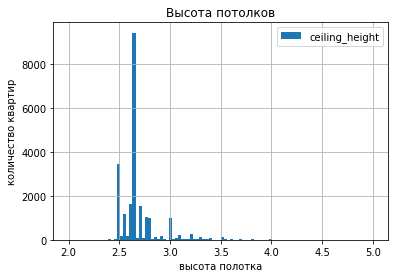

In [97]:
#посмотрим на распределение квартир по высоте потолков от 2 до 5 метров
data.plot(
    kind='hist',
    y='ceiling_height',
    bins=100,
    grid=True,
    range=(2,5),
    title='Высота потолков',
    legend=True
)

plt.xlabel("высота полотка")
plt.ylabel("количество квартир");

Самые распространенные квартиры - с потолками от 2 до 3 метров. Пик на 2,7 метров виден из-за заполнения отсутствующих ~40% данных медианой. Потолки выше ниже 2 метров и выше 3 метров встречаются крайне редко.

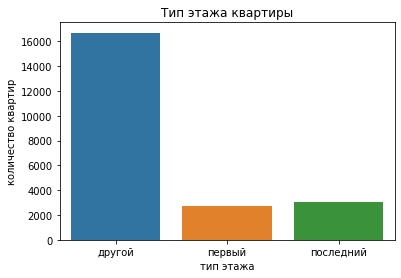

In [98]:
#посмотрим на распределение квартир по типу этажа
ax = sns.countplot(x='cat_floor', data=data)

ax.set (xlabel='тип этажа',
ylabel='количество квартир',
title='Тип этажа квартиры');

Меньше всего продают квартиры на первом этаже, чаще всего на продаже квартиры не первого и последнего этажей.

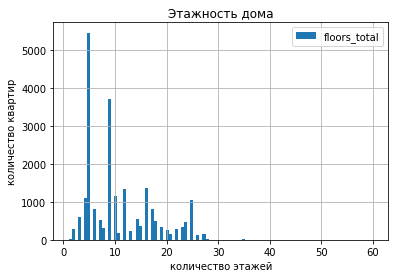

In [99]:
#посмотрим на распределение квартир по общему количеству этажей в доме
data.plot(
    kind='hist',
    y='floors_total',
    bins=100,
    grid=True,
    title='Этажность дома',
    legend=True
)

plt.xlabel("количество этажей")
plt.ylabel("количество квартир");

In [100]:
#посчитаем, сколько домов больше 30 этажей
data[data['floors_total'] > 35]['floors_total'].count()

6

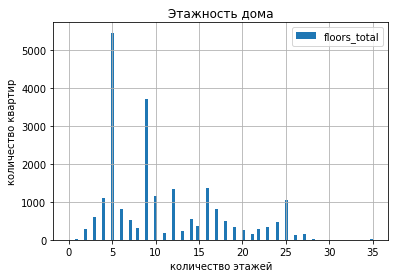

In [101]:
#не удаляем их - могут продаваться квартиры и в высотках. 
#посмотрим на графике распределение этажности до 35 этажа.
data.plot(
    kind='hist',
    y='floors_total',
    bins=100,
    grid=True,
    range=(0, 35),
    title='Этажность дома',
    legend=True
)

plt.xlabel("количество этажей")
plt.ylabel("количество квартир");

Ожидаемо, 5, 9 и 16-этажек больше всего 

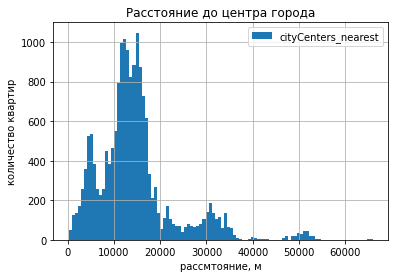

In [102]:
#посмотрим на распределение квартир по расстоянию до центра города в метрах
data.plot(
    kind='hist',
    y='cityCenters_nearest',
    bins=100,
    grid=True,
    title='Расстояние до центра города',
    legend=True
)

plt.xlabel("рассмтояние, м")
plt.ylabel("количество квартир");

Большинсство квартир продаются в радиусе 20 км до центра города

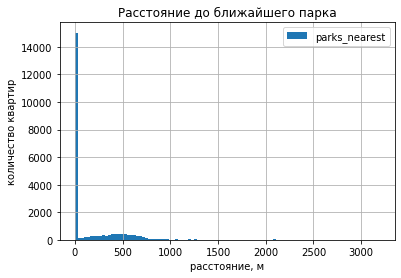

In [103]:
#посмотрим на распределение квартир по расстоянию до ближайшего парка
data.plot(
    kind='hist',
    y='parks_nearest',
    bins=100,
    grid=True,
    title='Расстояние до ближайшего парка',
    legend=True
)

plt.xlabel("расстояние, м")
plt.ylabel("количество квартир");

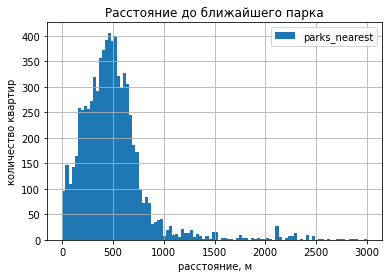

In [104]:
#исключим картиры с отсутствующими парками 
data.plot(
    kind='hist',
    y='parks_nearest',
    bins=100,
    grid=True,
    range=(1, 3000),
    title='Расстояние до ближайшего парка',
    legend=True
)

plt.xlabel("расстояние, м")
plt.ylabel("количество квартир");

Чаще всего парки есть в пределах 500 м (если вообще есть парки рядом). 

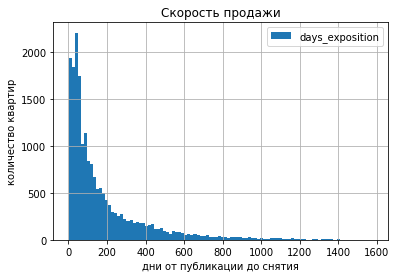

In [105]:
#посмотрим на распределение квартир по скорости продажи
data.plot(
    kind='hist',
    y='days_exposition',
    bins=100,
    grid=True,
    title='Скорость продажи',
    legend=True
)

plt.xlabel("дни от публикации до снятия")
plt.ylabel("количество квартир");

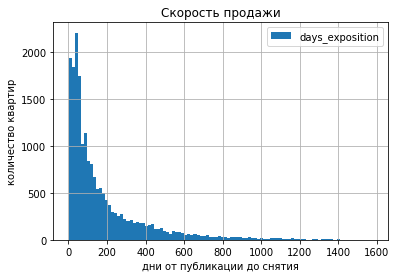

In [106]:
#исключим объявления с 0 временем - возможно, такие квартиры еще находятся в процессе продлажи. 
data.plot(
    kind='hist',
    y='days_exposition',
    bins=100,
    grid=True,
    range=(1, data['days_exposition'].max()),
    title='Скорость продажи',
    legend=True
)

plt.xlabel("дни от публикации до снятия")
plt.ylabel("количество квартир");

In [107]:
data['days_exposition'].describe()

count    19582.000000
mean       178.107446
std        216.634780
min          1.000000
25%         44.000000
50%         94.000000
75%        227.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [108]:
#посчитаем, сколько квартир продали меньше, чем за три дня и больше, чем за 3 года
data[(data['days_exposition'] <=3) | (data['days_exposition'] > 1095)]['days_exposition'].count()

152

Не удаляем эти хначения - они действительно могли бы быть. 

In [109]:
#посмотрим, какая доля квартир продается за месяц
data[data['days_exposition'] <=30]['days_exposition'].count() / data[['days_exposition']].count()

days_exposition    0.184966
dtype: float64

In [110]:
#посмотрим, какая доля квартир продается больше, чем за год 
data[data['days_exposition'] > 365]['days_exposition'].count() / data[['days_exposition']].count()

days_exposition    0.145695
dtype: float64

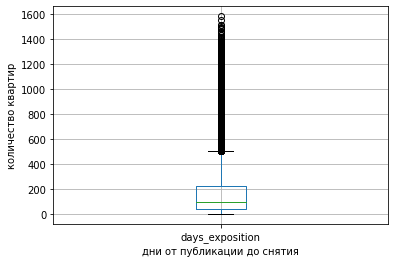

In [111]:
#посмотрим на графике на распределение скорости продажи квартир
data.boxplot(column=['days_exposition'], grid=True)
plt.xlabel("дни от публикации до снятия")
plt.ylabel("количество квартир");

"Быстрой" продажей можно счмтать продажу до 1,5 месяцев (44 дня), "медленной" - дольше 7,5 месяцев (227 дней). 
При этом часть медленных продаж лежит за пределами верхнего "уса" - такие квартиры продавались медленнее обычного. 

Посмотрим на графиках зависимость цены от разных параметров

Корелляция между параметрами: 0.65


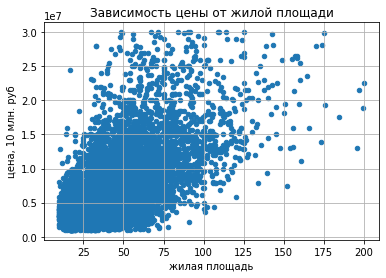

In [112]:
ax = data.plot(x='living_area', y='last_price', kind='scatter', sharex=False, grid=True);

ax.set (xlabel='жилая площадь',
ylabel='цена, 10 млн. руб',
title='Зависимость цены от жилой площади');

print('Корелляция между параметрами: {:.2}'.format(data.corr()['last_price']['living_area']))

Корелляция между параметрами: 0.44


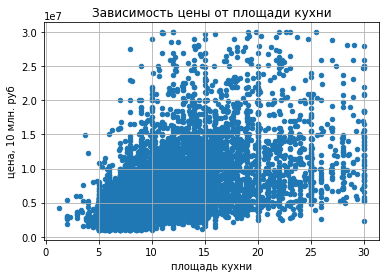

In [113]:
ax = data[data['kitchen_area'] > 0].plot(x='kitchen_area', y='last_price', kind='scatter', sharex=False, grid=True);

ax.set (xlabel='площадь кухни',
ylabel='цена, 10 млн. руб',
title='Зависимость цены от площади кухни');

print('Корелляция между параметрами: {:.2}'.format(data.corr()['last_price']['kitchen_area']))

Корелляция между параметрами: 0.78


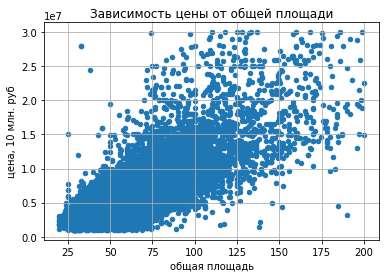

In [114]:
#Рассмотрим зависимость цены от общей площади
ax = data.plot(x='total_area', y='last_price', kind='scatter', sharex=False, grid=True);

ax.set (xlabel='общая площадь',
ylabel='цена, 10 млн. руб',
title='Зависимость цены от общей площади');

print('Корелляция между параметрами: {:.2}'.format(data.corr()['last_price']['total_area']))

Корелляция между параметрами: 0.49


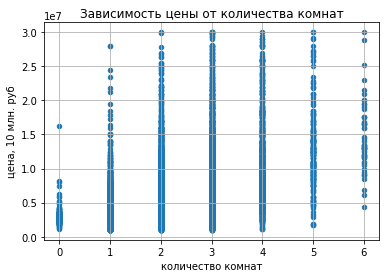

In [115]:
#Рассмотрим зависимость цены от количества комнат
ax = data.plot(x='rooms', y='last_price', kind='scatter', sharex=False, grid=True);

ax.set (xlabel='количество комнат',
ylabel='цена, 10 млн. руб',
title='Зависимость цены от количества комнат');

print('Корелляция между параметрами: {:.2}'.format(data.corr()['last_price']['rooms']))

Корелляция между параметрами: 0.35


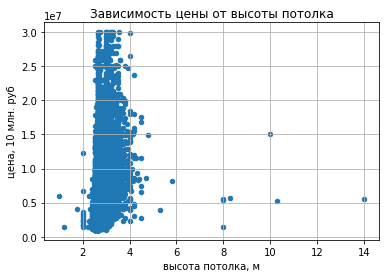

In [116]:
#Рассмотрим зависимость цены от высоты потолк
ax = data.plot(x='ceiling_height', y='last_price', kind='scatter', sharex=False, grid=True);

ax.set (xlabel='высота потолка, м',
ylabel='цена, 10 млн. руб',
title='Зависимость цены от высоты потолка');

print('Корелляция между параметрами: {:.2}'.format(data.corr()['last_price']['ceiling_height']))

In [117]:
#посмотри корелляцию между ценой и остальными параметрами, чтобы убедиться в отсутствии связи
data.corr()['last_price'].sort_values(ascending=False)

last_price             1.000000
total_area             0.777853
price_meter            0.664906
living_area            0.652699
rooms                  0.493816
kitchen_area           0.435605
ceiling_height         0.354236
ponds_around3000       0.293160
parks_around3000       0.276588
parks_nearest          0.239264
ponds_nearest          0.169261
total_images           0.146972
days_exposition        0.125453
floors_total           0.075241
floor                  0.073665
balcony                0.035621
is_apartment           0.021776
month_publication      0.009994
airports_nearest       0.001327
weekday_publication   -0.018940
year_publication      -0.027829
open_plan             -0.036688
studio                -0.052703
cityCenters_nearest   -0.346664
city_center_km        -0.347489
Name: last_price, dtype: float64

Явная прямая зависимость цены есть от: жиобщей площади, жилой площади, площади кухни, количества комнат и, что любопытно, от высоты потолков.

Посмотрим, как меняется цена за метр в зависимости от населенного пункта. 

In [118]:
#сделаем сводную по населенному пункту и посчитаем количество объявление и медианную цену за метр 
data_liv = data.pivot_table(index='locality_name', values='price_meter', aggfunc=('median', 'count')).sort_values(by='median',ascending=False)


In [119]:
#неинформативный вывод для населенных пунктов, где меньше 5 объявлений. Исправим это
data_liv_5 = data_liv[data_liv['count'] >=5]
data_liv_5

,count,median
locality_name,,
Санкт-Петербург,15001,103896.103896
Зеленогорск,24,101666.666667
Кудрово,170,100000.000000
Пушкин,357,99706.744868
Сестрорецк,179,99678.456592
...,...,...
посёлок городского типа Кузнечное,10,27303.523035
деревня Извара,5,27027.027027
Пикалёво,7,20905.923345


In [120]:
#ТОП-5 населенных пунктов с самыми дорогим квадратным метром
data_liv_5.head()

,count,median
locality_name,,
Санкт-Петербург,15001,103896.103896
Зеленогорск,24,101666.666667
Кудрово,170,100000.000000
Пушкин,357,99706.744868
Сестрорецк,179,99678.456592


In [121]:
#ТОП-5 населенных пунктов с самыми дешевым квадратным метром
data_liv_5.tail()

,count,median
locality_name,,
посёлок городского типа Кузнечное,10,27303.523035
деревня Извара,5,27027.027027
Пикалёво,7,20905.923345
городской посёлок Лесогорский,5,19833.333333
Сланцы,29,19230.769231


In [122]:
#Посмотрим среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений 
data_sort = data_liv.sort_values(by='count',ascending=False).head(10)
data_sort

,count,median
locality_name,,
Санкт-Петербург,15001,103896.103896
посёлок Мурино,518,85714.285714
посёлок Шушары,436,76876.172608
Всеволожск,396,65789.473684
Пушкин,357,99706.744868
Колпино,337,74722.222222
посёлок Парголово,326,91780.224134
Гатчина,305,67796.610169
деревня Кудрово,298,91930.232558


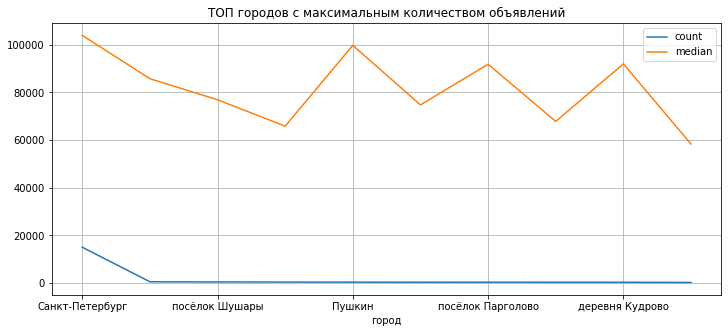

In [123]:
#посмотрим на графике
data_liv_v = (
    data.pivot_table(index='locality_name', values='price_meter', aggfunc=('median', 'count'))
    .sort_values(by='count',ascending=False).head(10)
    .plot(grid=True, figsize=(12, 5), legend=True)
)

data_liv_v.set (xlabel='город',
title='ТОП городов с максимальным количеством объявлений');

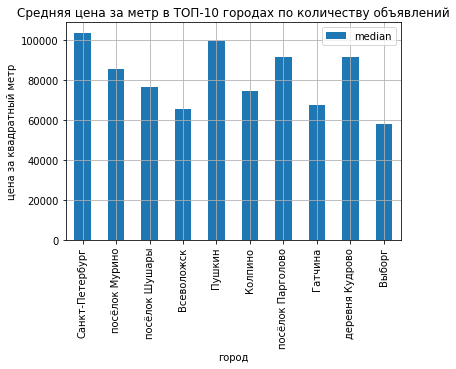

In [124]:
#оставим на графике только медиану по цене за квадратный метр
data_sort.plot(
    kind = 'bar',
    y='median',
    grid=True,
    title='Средняя цена за метр в ТОП-10 городах по количеству объявлений',
    legend=True
);

plt.xlabel("город")
plt.ylabel("цена за квадратный метр");

5.	Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города — постройте график изменения средней цены для каждого километра от центра Петербурга.

In [125]:
data_SPb = data.query('locality_name == "Санкт-Петербург"')
price_km_SPb = data_SPb['city_center_km'] / data_SPb['price_meter']
price_km_SPb

0        0.000133
2        0.000151
7        0.000109
9        0.000169
10       0.000110
           ...   
23689    0.000159
23690    0.000057
23691    0.000031
23694    0.000055
23697    0.000067
Length: 15001, dtype: float64

Неинформативно. Посмотрим на графике зависимость итоговой цены от удаленности от центра города

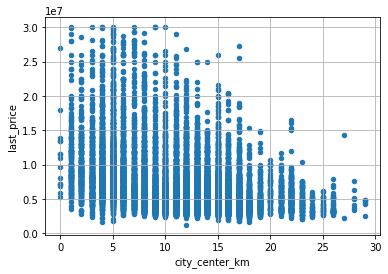

In [126]:
data_SPb.plot(x='city_center_km', y='last_price', kind='scatter', sharex=False, grid=True);

In [127]:
data_SPb.corr()['last_price']['city_center_km']

-0.41174874798542505

In [128]:
data_SPb.corr()['price_meter']['city_center_km']

-0.32892313622111885

Здесь уже прослеживается более явная зависимость: чем дальше от центра, тем меньше стоимость квартиры.
Стоимость за квадратный метр аналогично снижается при удаленнсоти от центра, но несколько меньше, чем общая цена. 

Выводы:
1. Из данных исключены редкие или неправдоподобные значения:
- квартиры площадью менее 20 м и более 200;
- жилая площадь менее 10 м и более 200 м;
- квартиры с кухней площадью > 30;
- квартиры стоимостью менее 1 млн и более 30 млн.

2. Наблюдения по объектам недвижимости: 
- чаще всего парки есть в пределах 500 м (если вообще есть парки рядом);
- меньше всего продают квартиры на первом этаже, чаще всего на продаже квартиры не первого и последнего этажей;
- 18,5% квартир продаются за месяц.

3. Есть прямая завимисость цены квартиры от: 
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- высоты потолков.

4. Самые дорогие квартиры по стоимости за квадратный метр - в Санкт_петербурге, как и большинство объявлений.
5. Чем дальше от центра Санкт-Петербурга, тем дешевле квартиры в пределах города. 
6. Самые дешевые квартиры по цене за квадратный метр - в Сланцах. 

### Общий вывод

Установить параметры, влияющие на цену объектов недвижимости на примере Санкт-Петербурга и соседних населенных пунктов;
Сформировать выводы в виде тезисов для построения автоматизированной системы отслеживания аномалий и мошеннических действий.


Цена объекта недвижимости напрямую зависит от: 
1. Расположения объекта: 
- город/область: в Санкт-Петербурге квартиры дороже;
- расстояние до центра: в Санкт-Петербурге дороже квартиры, расположенные ближе к центру города;

2. Параментров объекта:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- высоты потолков. \
Прочие параметры не имеют значимой корелляции с ценой объекта недвижимости. 


Предложения по сбору данных:
1. Сделать обязательнымм для заполнения в объявлениях поля:
- высота потолков, сделать проверку вводимых значений (допустимые значения - 2-10 метров);
- всего этажей в доме, т.к. информация требуется для расчета типа этажа;
- апартаменты. 

2. Автоматизировать заполнение части данных в объявлении (из Росреестра):
- жилая площадь в квадратных метрах (м²);
- площадь кухни в квадратных метрах (м²);
- число балконов;
- название населённого пункта по адрегу регистрации объекта недвижимости.